In [19]:


import os
import pandas as pd

# Directory containing the CSV files
directory = 'D:/1. UNCC/Spring 2024/IV/Communication Project/policy'

# List all files in the directory
files = os.listdir(directory)

# Filter out only the files ending with '_policy'
policy_files = [file for file in files if file.endswith('_policy.csv')]

# Iterate through each policy file
for file in policy_files:
    # Construct the full path to the file
    file_path = os.path.join(directory, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Do whatever you want with the DataFrame, for example:
    print(f"DataFrame for {file}:")
    print(df.head())  # Display the first few rows of the DataFrame


DataFrame for Alabama_policy.csv:
        date                                             policy  \
0   6-Mar-20  Governor Ivey announced the formation of a Cor...   
1  10-Mar-20  Governor Ivey sent a memo to state agency head...   
2  13-Mar-20  Governor Ivey issued a state of emergency for ...   
3  14-Mar-20  Governor Ivey closed all Alabama public school...   
4  15-Mar-20  Governor Ivey authorized directors of all stat...   

  Restrict/Close Opening (State)  Deferring to County Testing Education  \
0            NaN             NaN                  NaN     NaN       NaN   
1            NaN             NaN                  NaN     NaN       NaN   
2            NaN             NaN                  NaN     NaN       NaN   
3              Y             NaN                  NaN     NaN         Y   
4            NaN             NaN                  NaN     NaN       NaN   

  Health/Medical Emergency Level  Transportation Budget Social Distancing  \
0            NaN             NaN   

In [20]:
import os
import pandas as pd

# Directory containing the CSV files
directory = 'D:/1. UNCC/Spring 2024/IV/Communication Project/policy'


# List all files in the directory
files = os.listdir(directory)

# Filter out only the files ending with '_policy'
policy_files = [file for file in files if file.endswith('_policy.csv')]

# Define the common column names
common_columns = ['date', 'policy', 'Restrict/Close', 'Opening (State)', 'Deferring to County', 'Testing', 'Education', 'Health/Medical', 'Emergency Level', 'Transportation', 'Budget', 'Social Distancing', 'Other', 'Vaccine']

# Iterate through each policy file
for file in policy_files:
    # Construct the full path to the file
    file_path = os.path.join(directory, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, names=common_columns)
    
    # Do whatever you want with the DataFrame, for example:
    print(f"DataFrame for {file}:")
    print(df.head())  # Display the first few rows of the DataFrame


DataFrame for Alabama_policy.csv:
        date                                             policy  \
0       date                                             policy   
1   6-Mar-20  Governor Ivey announced the formation of a Cor...   
2  10-Mar-20  Governor Ivey sent a memo to state agency head...   
3  13-Mar-20  Governor Ivey issued a state of emergency for ...   
4  14-Mar-20  Governor Ivey closed all Alabama public school...   

   Restrict/Close  Opening (State)  Deferring to County  Testing  Education  \
0  Restrict/Close  Opening (State)  Deferring to County  Testing  Education   
1             NaN              NaN                  NaN      NaN        NaN   
2             NaN              NaN                  NaN      NaN        NaN   
3             NaN              NaN                  NaN      NaN        NaN   
4               Y              NaN                  NaN      NaN          Y   

   Health/Medical  Emergency Level  Transportation  Budget  Social Distancing  \
0  Heal

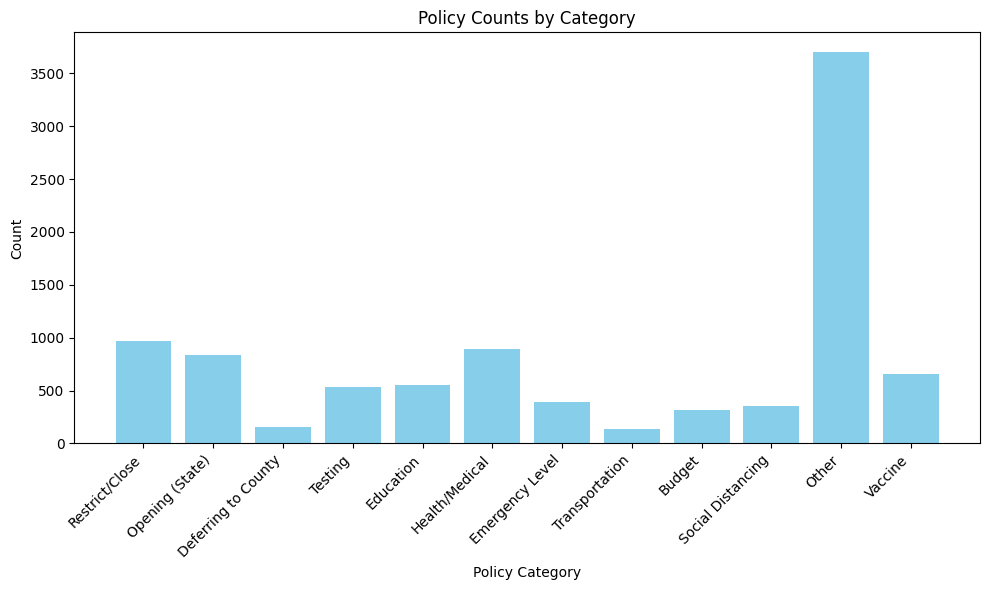

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# List all files in the directory
files = os.listdir(directory)

# Filter out only the files ending with '_policy'
policy_files = [file for file in files if file.endswith('_policy.csv')]

# Define the common column names
common_columns = ['date', 'policy', 'Restrict/Close', 'Opening (State)', 'Deferring to County', 'Testing', 'Education', 'Health/Medical', 'Emergency Level', 'Transportation', 'Budget', 'Social Distancing', 'Other', 'Vaccine']

# Initialize a dictionary to store policy counts
policy_counts = {category: 0 for category in common_columns[2:]}

# Iterate through each policy file
for file in policy_files:
    # Construct the full path to the file
    file_path = os.path.join(directory, file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path, names=common_columns)
    
    # Iterate through each policy category and count occurrences
    for category in common_columns[2:]:
        policy_counts[category] += df[category].count()

# Convert the policy counts dictionary into a DataFrame
policy_counts_df = pd.DataFrame(list(policy_counts.items()), columns=['Category', 'Count'])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(policy_counts_df['Category'], policy_counts_df['Count'], color='skyblue')
plt.xlabel('Policy Category')
plt.ylabel('Count')
plt.title('Policy Counts by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Dropdown(description='Select State:', options=('Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', '…

interactive(children=(Dropdown(description='Select State:', options=('Alabama', 'Alaska', 'American Samoa', 'A…

<Figure size 640x480 with 0 Axes>

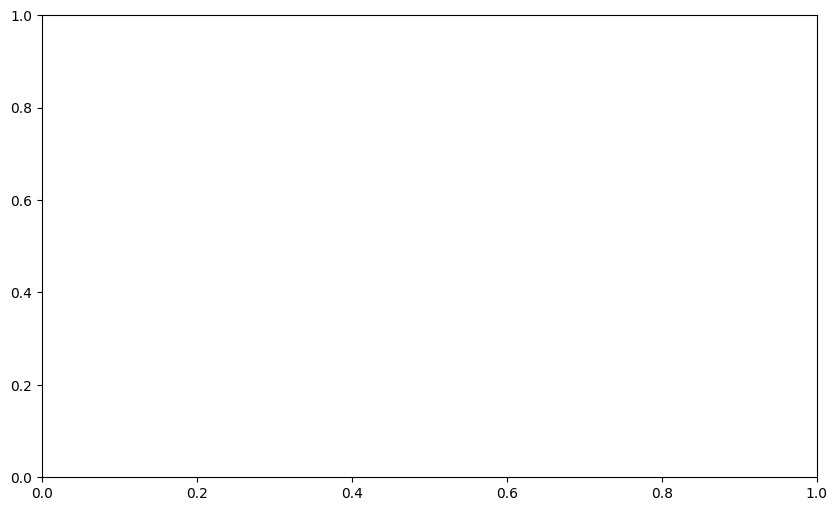

<Figure size 640x480 with 0 Axes>

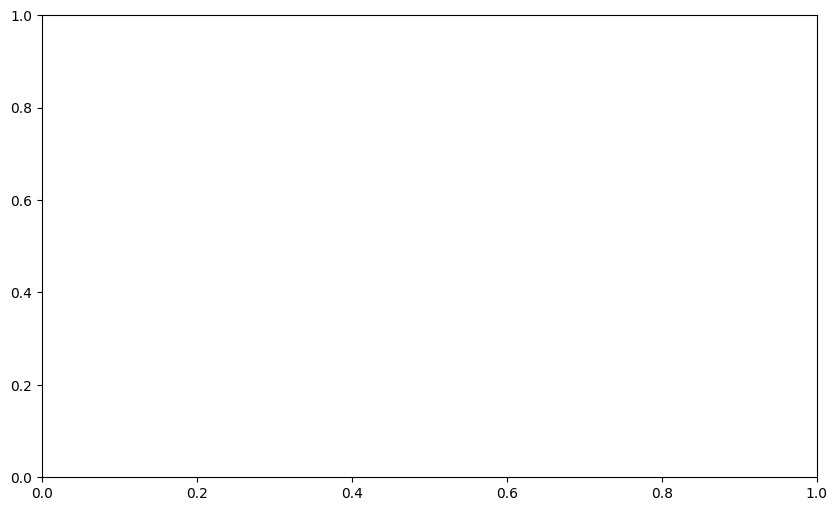

In [7]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display



# List all files in the directory
files = os.listdir(directory)

# Filter out only the files ending with '_policy'
policy_files = [file for file in files if file.endswith('_policy.csv')]

# Define the common column names
common_columns = ['date', 'policy', 'Restrict/Close', 'Opening (State)', 'Deferring to County', 'Testing', 'Education', 'Health/Medical', 'Emergency Level', 'Transportation', 'Budget', 'Social Distancing', 'Other', 'Vaccine']

# Load all data into a dictionary of DataFrames, one per state
state_data = {}
for file in policy_files:
    state = file.replace('_policy.csv', '')
    file_path = os.path.join(directory, file)
    state_data[state] = pd.read_csv(file_path, names=common_columns)

# Get list of states
states = list(state_data.keys())

# Create dropdown widget for selecting states
state_dropdown = widgets.Dropdown(
    options=states,
    description='Select State:',
    disabled=False
)

# Function to update the plot based on selected state
def update_plot(selected_state):
    # Clear previous plot
    plt.clf()
    
    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Extract data for selected state
    selected_data = state_data[selected_state]
    
    # Drop non-numeric columns
    numeric_data = selected_data.drop(columns=['date', 'policy'], errors='ignore')
    
    # Check if any numeric columns exist
    if len(numeric_data.columns) == 0:
        print("No numeric data available for plotting.")
        return
    
    # Create box plot for each policy category
    numeric_data.boxplot(ax=ax, vert=False)
    
    # Set plot labels and title
    ax.set_xlabel('Count')
    ax.set_title(f'Policy Metrics for {selected_state}')
    
    # Show plot
    plt.show()

# Display the dropdown widget
display(state_dropdown)

# Call update_plot function when dropdown value changes
widgets.interactive(update_plot, selected_state=state_dropdown)




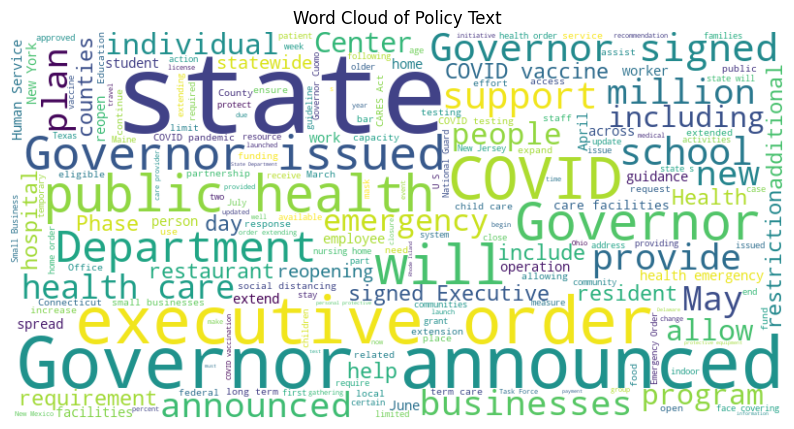

In [17]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Directory containing the CSV files

# List all files in the directory
files = os.listdir(directory)

# Filter out only the files ending with '_policy'
policy_files = [file for file in files if file.endswith('_policy.csv')]

# Define the common column names
common_columns = ['date', 'policy', 'Restrict/Close', 'Opening (State)', 'Deferring to County', 'Testing', 'Education', 'Health/Medical', 'Emergency Level', 'Transportation', 'Budget', 'Social Distancing', 'Other', 'Vaccine']

# Concatenate policy text from all states into a single string
policy_text = ''
for file in policy_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, names=common_columns)
    policy_text += ' '.join(df['policy'].dropna()) + ' '

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(policy_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Policy Text')
plt.show()


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display



time_series_file = 'time_series_covid19_confirmed_US.csv'

# List all files in the policy directory
policy_files = os.listdir(directory)

# Extract prefixes from policy file names
policy_prefixes = [file.split('_')[0] for file in policy_files]

# Load time series data
time_series_data = pd.read_csv(os.path.join(directory, time_series_file))

# Create dropdown widget for selecting policy files
policy_dropdown = widgets.Dropdown(
    options=policy_prefixes,
    description='Select State:',
    disabled=False
)

# Display the dropdown widget
display(policy_dropdown)

# Function to perform policy impact analysis
def perform_policy_analysis(selected_state):
    # Clear previous plot
    plt.clf()
    
    # Load selected policy data
    selected_policy_file = selected_state + '_policy.csv'
    selected_policy_data = pd.read_csv(os.path.join(directory, selected_policy_file))
    
    # Filter rows in time series data based on selected state
    state_time_series_data = time_series_data[time_series_data['Province_State'] == selected_state]
    
    # Print column names of state_time_series_data
    print(state_time_series_data.columns)
    
    # Assuming you have specific columns in the time series data to use for analysis
    # You can use state_time_series_data['column_name'] to access the data
    
    # Visualize the relationship using a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(state_time_series_data['Date'], state_time_series_data['COVID19_Cases'], label='COVID-19 Cases')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.title(f'COVID-19 Cases Over Time in {selected_state}')
    
    # Adding vertical lines to indicate policy dates
    policy_dates = pd.to_datetime(selected_policy_data['date'])
    for policy_date in policy_dates:
        plt.axvline(policy_date, color='r', linestyle='--', alpha=0.5)  # Vertical line for each policy date
    
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call perform_policy_analysis function when dropdown value changes
widgets.interactive(perform_policy_analysis, selected_state=policy_dropdown)



Dropdown(description='Select State:', options=('Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', '…

interactive(children=(Dropdown(description='Select State:', options=('Alabama', 'Alaska', 'American Samoa', 'A…

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>